In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score


In [22]:
X=6*np.random.rand(300,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(300,1)

Text(0, 0.5, 'y')

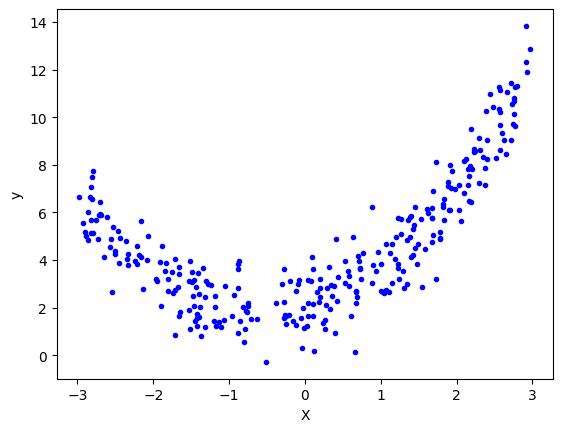

In [23]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)
print("R2 score:",r2)

MSE: 6.173319625607219
R2 score: 0.27413408177318666


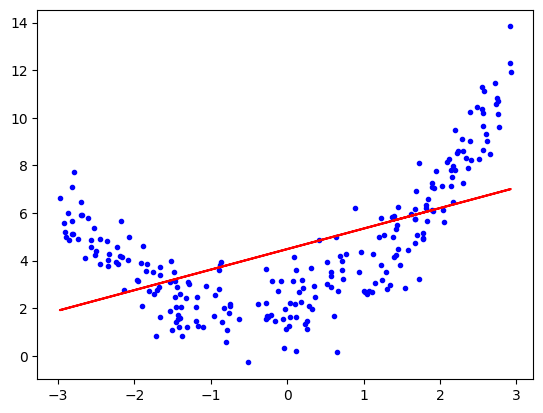

In [26]:
plt.plot(X_train,y_train,'b.',X_train,regressor.predict(X_train),'r')

In [27]:
#creating polynomial features

In [31]:
features=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=features.fit_transform(X_train)
X_test_poly=features.transform(X_test)

In [32]:
poly_regressor=LinearRegression()
poly_regressor.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
print(mean_squared_error(y_test,poly_regressor.predict(X_test_poly)))

0.7881074942202504


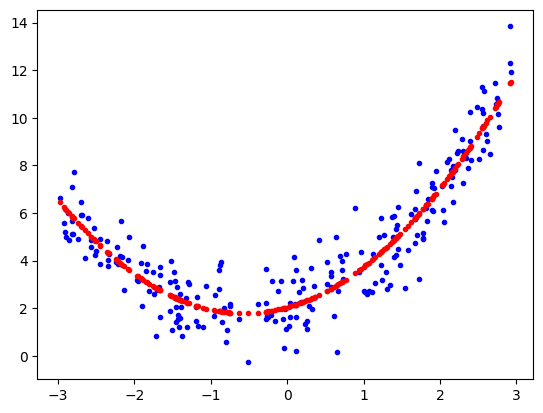

In [39]:
plt.plot(X_train,y_train,'b.',X_train,poly_regressor.predict(X_train_poly),'r.')

In [37]:
poly_regressor.coef_

array([[0.89807543, 0.7996819 ]])

In [59]:


def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

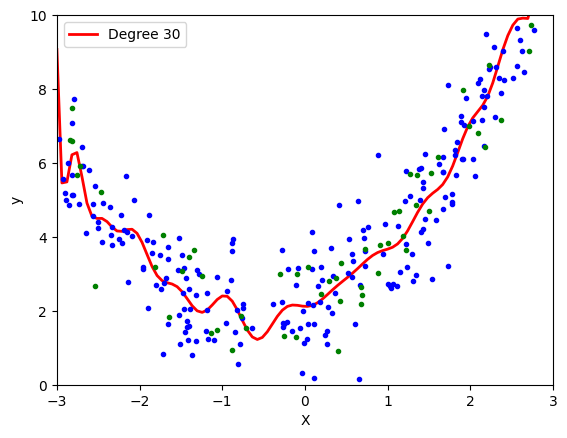

In [63]:
polynomial_regression(30)

In [64]:
poly=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [67]:
sgd=SGDRegressor(max_iter=1000)
sgd.fit(X_train_poly,y_train)

c:\Users\sirij\anaconda3\envs\Scratch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [68]:
X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

In [69]:
y_pred=sgd.predict(X_test_poly)

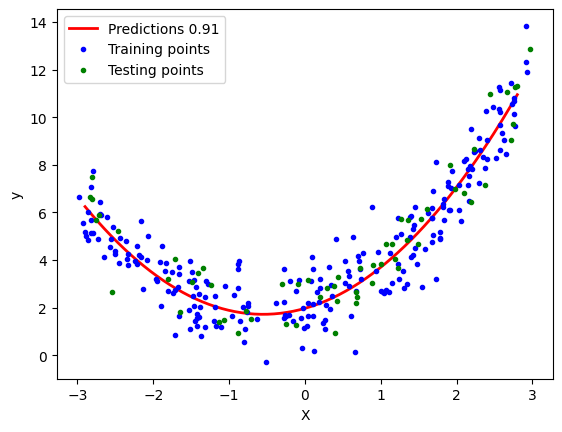

In [71]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [72]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [74]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [77]:

X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [78]:

poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)
X_multi_trans.shape

(100, 496)

In [85]:

lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:

X_test_multi = poly.transform(final)
z_final = lr.predict(X_test_multi).reshape(10,10)

In [91]:

z_final = lr.predict(X_multi_trans)

In [92]:
z_final.shape

(100, 1)

In [93]:
mse = mean_squared_error(z,z_final)

In [94]:
mse

8.74792101426812